# JSON OUTPUTS ANALYZER

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("C:/Users/Olivier Desclaux/Desktop/4A - X/Cours EPM/Recherche/SLP-Code") #accessing all functions from SLP-Code
from data.SLP_RD import SLP_RD
import cv2
import utils.vis as vis

In [2]:
with open('HRpose_danaLab_depth_simLab_depth_uncover.json') as json_file:
    outputs = json.load(json_file)
    

In [3]:
sz_pch = (256,256)
sz_pch[::-1]

(256, 256)

In [4]:
preds_ori = outputs['preds_ori'] #est-ce-que les données sont toutes arrondies ??
joints_ori = outputs['joints_ori'] #est-ce que c'est des pixels? des cm ? mm? Lama pense que c'est des coordonées locales dans un repère associé à l'image
# ca expliquerait pourquoi on normaliserait 
l_std_ori_all = outputs['l_std_ori_all'] #longueur du segment thorax tete ? 
err_nmd = outputs['err_nmd'] #error normalised
pck = outputs['pck']

normaliser par un segment serait biaisé ? Il y a forcément de la variabilité ? si on prend la moyenne sur tous les patients ? 
est-ce que ca serait la taille de la tete de chaque patient ? ou plutto de tous les segments de chaque patients? oui cest ca. 
il irait prendre

In [5]:
x = joints_ori[0] #pourquoi est-ce que ces valeurs sont des floats et pas des entiers (ca devrait représenter des coordonées de pixels)

In [6]:
x = np.array(joints_ori[1])
np.linalg.norm(x[13, :] - x[12, :])

35.50622031165423

In [7]:
l_std_ori_all[1]

35.506221771240234

In [8]:
joints_ori_test = np.array(joints_ori[0])
preds_ori_test = np.array(preds_ori[0])
print(np.sqrt(sum((joints_ori_test - preds_ori_test)**2,0)))
print(np.shape(preds_ori))
print(np.shape(joints_ori))
print(np.shape(l_std_ori_all))
print(np.shape(err_nmd))
print(np.shape(pck))

[11.85507006 13.5891919 ]
(315, 14, 2)
(315, 14, 2)
(315,)
(315, 14)
(15, 11)


# Depth

Text(0.5, 1.0, 'Train: danaLab/depth \n Test: simLab/depth')

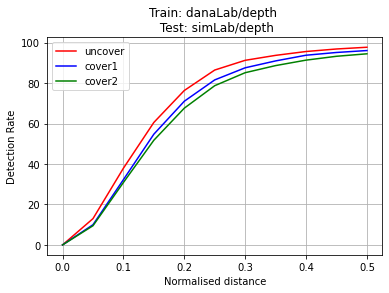

In [10]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig = plt.plot()
ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    json_path = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'
    
    with open(json_path) as json_file:
        outputs = json.load(json_file)
        
    preds_ori = outputs['preds_ori']
    joints_ori = outputs['joints_ori']
    l_std_ori_all = outputs['l_std_ori_all']
    err_nmd = outputs['err_nmd']
    pck = outputs['pck']
    
    global_pck = pck[-1]
    
    plt.plot(ticks, global_pck, color=colors[i], label = cov)

plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Normalised distance')
plt.ylabel('Detection Rate')
plt.title('Train: danaLab/depth \n Test: simLab/depth')

# IR

Text(0.5, 1.0, 'Train: danaLab/IR \n Test: simLab/IR')

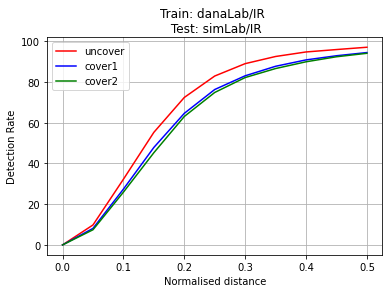

In [11]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig = plt.plot()
ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    json_path = 'HRpose_danaLab_IR_simLab_IR_'+ cov +'.json'
    
    with open(json_path) as json_file:
        outputs = json.load(json_file)
        
    preds_ori = outputs['preds_ori']
    joints_ori = outputs['joints_ori']
    l_std_ori_all = outputs['l_std_ori_all']
    err_nmd = outputs['err_nmd']
    pck = outputs['pck']
    
    global_pck = pck[-1]
    
    plt.plot(ticks, global_pck, color=colors[i], label = cov)

plt.grid()    
plt.legend(loc = 'best')
plt.xlabel('Normalised distance')
plt.ylabel('Detection Rate')
plt.title('Train: danaLab/IR \n Test: simLab/IR')

# Comparing global pck for each cover

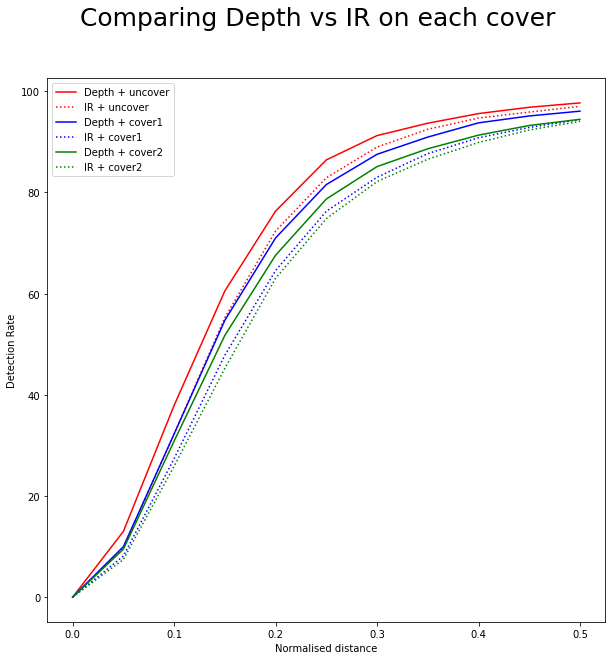

In [75]:
cov_li = ['uncover', 'cover1', 'cover2']
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(1, 1)
fig.suptitle('Comparing Depth vs IR on each cover', fontsize = 25)
fig.set_figheight(10)
fig.set_figwidth(10)
ticks = np.linspace(0,0.5,11) #ticks used in main

for i, cov in enumerate(cov_li):
    c = colors[i]
    json_path_IR = 'HRpose_danaLab_IR_simLab_IR_'+ cov +'.json'
    json_path_depth = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'
    
    with open(json_path_IR) as json_file:
        outputs_IR = json.load(json_file)
    with open(json_path_depth) as json_file:
        outputs_depth = json.load(json_file)

    pck_depth = outputs_depth['pck']
    pck_IR = outputs_IR['pck']
    
    global_pck_depth = pck_depth[-1]
    global_pck_IR = pck_IR[-1]
    
    axs.plot(ticks, global_pck_depth, color=c, label = 'Depth + ' + cov)
    axs.plot(ticks, global_pck_IR, color=c, linestyle = ':', label = 'IR + ' + cov)
    axs.legend(loc = 'best')
    axs.set(xlabel='Normalised distance',  ylabel = 'Detection Rate')

# plt.grid()    
# plt.legend(loc = 'best')
# plt.xlabel('Normalised distance')
# plt.ylabel('Detection Rate')
# plt.title('Train: danaLab/IR \n Test: simLab/IR')

# Comparing cover results for each joints

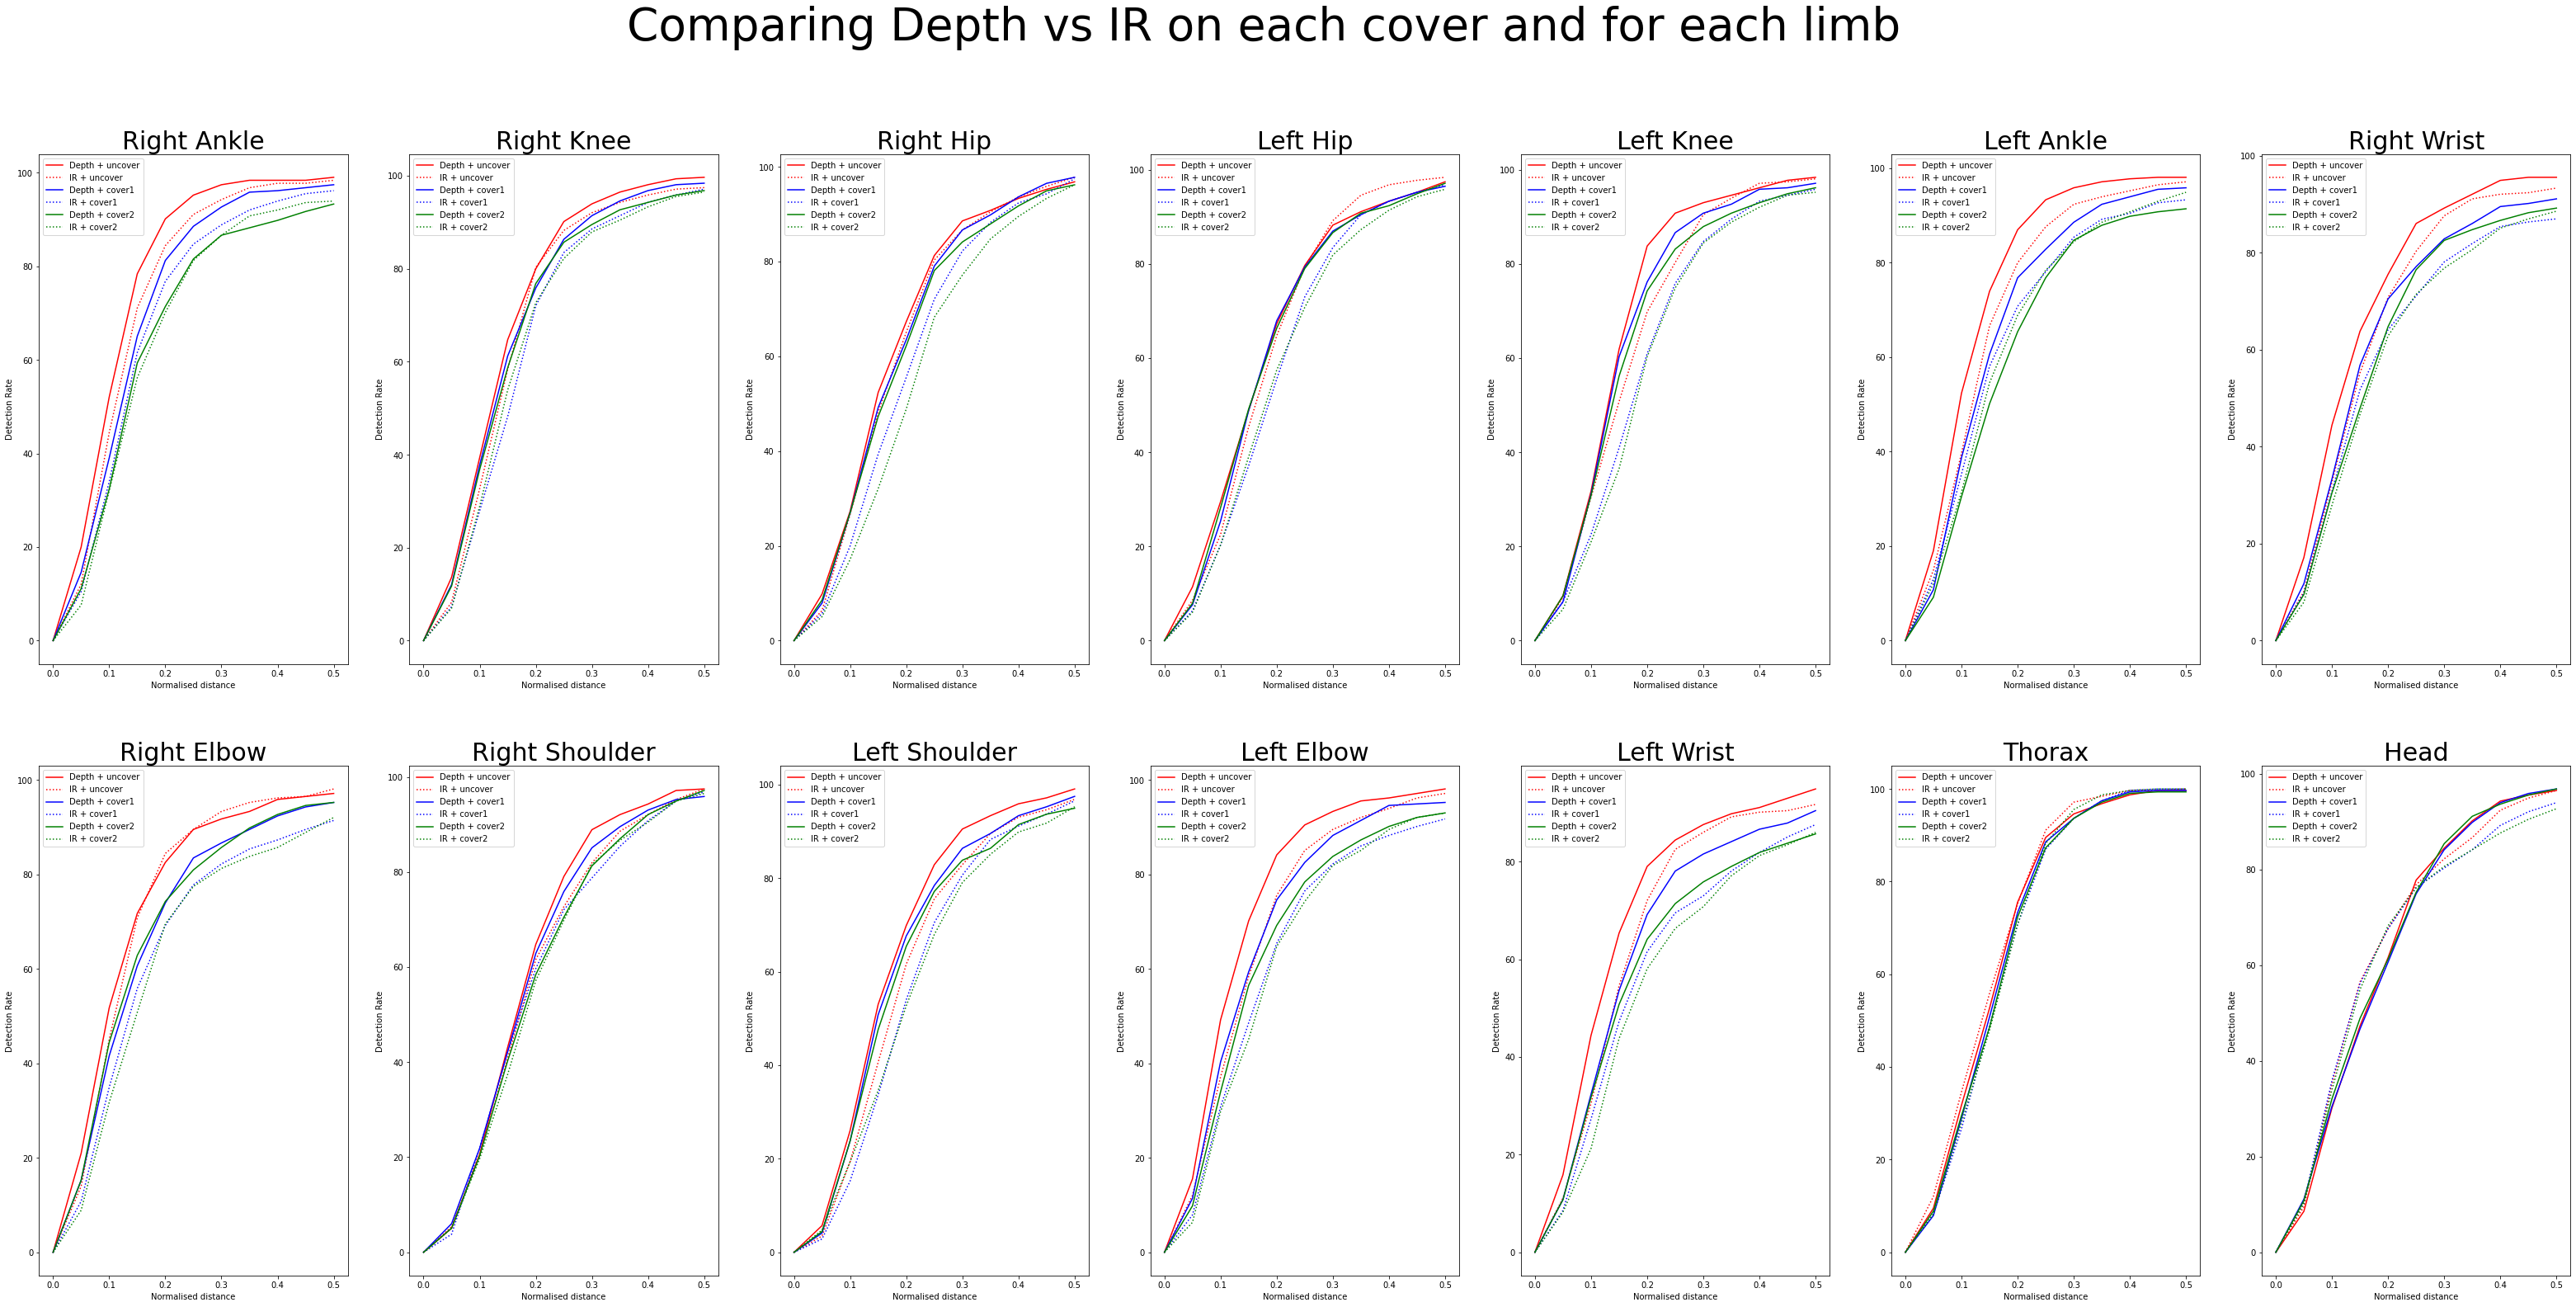

In [3]:
cov_li = ['uncover', 'cover1', 'cover2']
joints_name = ["Right Ankle", "Right Knee", "Right Hip", "Left Hip", "Left Knee", "Left Ankle", "Right Wrist", "Right Elbow", "Right Shoulder", "Left Shoulder","Left Elbow", "Left Wrist", "Thorax", "Head"]
colors = ['r', 'b', 'g']
fig, axs = plt.subplots(2, 7)
fig.set_figheight(25)
fig.set_figwidth(55)
fig.suptitle('Comparing Depth vs IR on each cover and for each limb', fontsize = 55)

ticks = np.linspace(0,0.5,11) #ticks used in main

for j, joint in enumerate (joints_name):
    row = j//7
    col = j%7
    ax = axs[row, col]


    for i, cov in enumerate(cov_li):
        c = colors[i]
        json_path_IR = 'HRpose_danaLab_IR_simLab_IR_'+ cov +'.json'
        json_path_depth = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'
        
        with open(json_path_IR) as json_file:
            outputs_IR = json.load(json_file)
        with open(json_path_depth) as json_file:
            outputs_depth = json.load(json_file)
            


        pck_depth = outputs_depth['pck']
        pck_IR = outputs_IR['pck']
        
        global_pck_depth = pck_depth[j]
        global_pck_IR = pck_IR[j]
        
        ax.plot(ticks, global_pck_depth, color=c, label = 'Depth + ' + cov)
        ax.plot(ticks, global_pck_IR, color=c, linestyle = ':', label = 'IR + ' + cov)
        ax.set_title(joint, fontsize = 30)
        ax.legend(loc = 'best')
        ax.set(xlabel='Normalised distance',  ylabel = 'Detection Rate')

    # plt.grid()    
    # plt.legend(loc = 'best')
    # plt.xlabel('Normalised distance')
    # plt.ylabel('Detection Rate')
    # plt.title('Train: danaLab/IR \n Test: simLab/IR')

# Visualising predictions on images

## Setting the info

In [73]:
# Info about the image you want to visualise
idx = 57         # the index you want
mod = 'depth'
cov = 'uncover'
json_path = 'HRpose_danaLab_depth_simLab_depth_'+ cov +'.json'

## Extracting the predictions

In [62]:
with open(json_path) as json_file:
    outputs = json.load(json_file)

preds_ori_idx = np.array(outputs['preds_ori'][idx])
joints_ori_idx = np.array(outputs['joints_ori'][idx])
l_std_ori_all_idx = np.array(outputs['l_std_ori_all'][idx])
err_nmd_idx = np.array(outputs['err_nmd'][idx])

## Loading Images

In [63]:
class pseudo_opts:
    SLP_fd = 'D:\SLP\danaLab' # give your dataset folder here 
    sz_pch=[256, 256]
    fc_depth = 50
    cov_li = [cov]       # give the cover class you want here 

In [64]:
SLP_Reader = SLP_RD(pseudo_opts, phase='test')  # all test result

initializing SLP: 100%|██████████| 102/102 [00:01<00:00, 55.49it/s]


## Extracting the images

In [74]:
# image in RGB
RGB, jtA, bbA = SLP_Reader.get_array_joints(idx_smpl=idx, mod='RGB')
hA, wA = RGB.shape[:2]

# image in the specific mod
gt_image, gt_joints, gt_bb = SLP_Reader.get_array_joints(idx_smpl=idx, mod=mod)
gt_h, gt_w = gt_image.shape[:2] 


phyVec = SLP_Reader.get_phy(idx=idx) #get physical parameters


## Resizing everything for notebook readability

In [75]:
h = 256 # For resizing
#resize RGB
scal_RGB = h/hA 
RGB_rsz = cv2.resize(RGB, (int(wA * h /hA), h))

# resize mod
scale_factor = h/gt_h
gt_image_rsz = cv2.resize(gt_image, (int(gt_w * scale_factor), h))
gt_image_rsz_3c = np.stack((gt_image_rsz,)*3, axis=-1) # duplicate the image to 3 channels so it is seen as an RGB image (better for plotting)

# resize joints
joints_ori_idx_rsz = joints_ori_idx.copy() * scale_factor

# add ones to the 3D column of the predictions for plotting
joints_ori_idx_rsz = np.append(joints_ori_idx_rsz, np.ones((len(joints_ori_idx_rsz),1)), 1)


## Computing the skeletons

In [76]:
mod_img_skel = vis.vis_keypoints(gt_image_rsz_3c, joints_ori_idx_rsz, SLP_Reader.skels_idx)

# show skel, correct 
jt_RGB_rsz = jtA.copy() *scal_RGB
jt_RGB_rsz[:,2] = 1
RGB_img_skel = vis.vis_keypoints(RGB_rsz[:,:,::-1], jt_RGB_rsz, SLP_Reader.skels_idx)


## Outputting the images

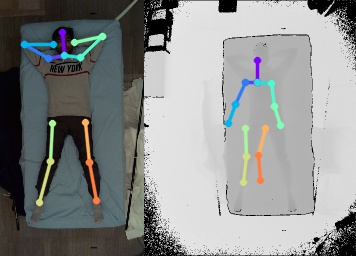

In [77]:
img_cb = np.concatenate([RGB_img_skel, mod_img_skel], axis=1)
vis.ipyth_imshow(img_cb) 

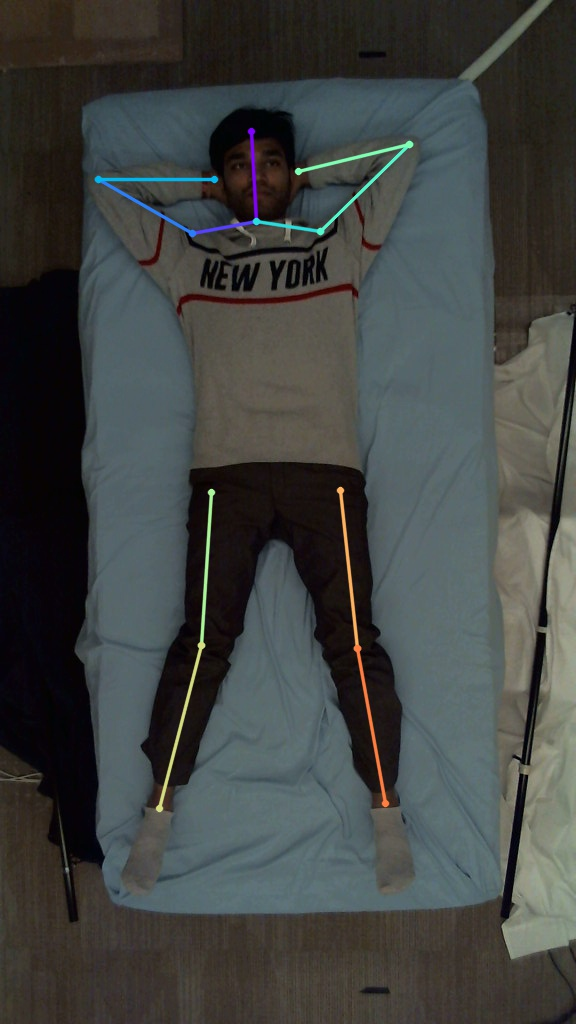

In [78]:
jtA2 = jtA.copy()
jtA2[:,2] = 1
RGB_img = vis.vis_keypoints(RGB[:,:,::-1], jtA2, SLP_Reader.skels_idx)
vis.ipyth_imshow(RGB_img)

In [105]:
# init dataset 
class pseudo_opts:
    SLP_fd = 'D:\SLP\danaLab' # give your dataset folder here 
    sz_pch=[256, 256]
    fc_depth = 50
    cov_li = ['cover1']        # give the cover class you want here 

# SLP_rd_test = SLP_RD(pseudo_opts, phase='test')  # all test result
SLP_rd_test = SLP_RD(pseudo_opts, phase='train')  # all test result

# get image, joints and corresponding bounding box, this is frequently used to feed data to the data loader during training.

initializing SLP: 100%|██████████| 102/102 [00:03<00:00, 26.80it/s]


In [106]:
idx = 57         # the index you want
RGB, jtA, bbA = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='RGB')
depth, jtB, bbB = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='depth')
PM, jt_PM, bb_PM = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='PM')
IR, jt_IR, bb_IR = SLP_rd_test.get_array_joints(idx_smpl=idx, mod='IR')

      # image version  
phyVec = SLP_rd_test.get_phy(idx=idx)
hA, wA = RGB.shape[:2]
hB, wB = depth.shape[:2] 
h_PM, w_PM = PM.shape[:2] 
h_IR, w_IR = IR.shape[:2]

In [107]:
# resize for notebook readability 
h = 512 
scal_RGB = h/hA 
RGB_rsz = cv2.resize(RGB, (int(wA * h /hA), h))
scal_depth = h/hB
depth_rsz = cv2.resize(depth, (int(wB * h /hB), h))
depth_rsz_3c = np.stack((depth_rsz,)*3, axis=-1)
scal_PM = h/h_PM
PM_rsz = cv2.resize(PM, (int(w_PM*h/h_PM), h))
PM_rsz_3c = np.stack((PM_rsz,)*3, axis=-1)
scal_IR = h/h_IR
IR_rsz = cv2.resize(IR, (int(w_IR*h/h_IR), h))
IR_rsz_3c = np.stack((IR_rsz,)*3, axis=-1)

img_cb_ori =  np.concatenate([RGB_rsz[...,::-1], depth_rsz_3c], axis=1)
# show the bb of RGB and bbox 

print('the joints of RGB {} is'.format(idx)) 
print(jtA)
print('the bounding box is') 
print(bbA)
print('physical parameters are')
print('weight {},  height {}, gender(1:male, 0:female) {}, bust {},	waist {}, hip {}， right upper arm {}， right lower arm {}， right upper leg {}， right lower leg {}'.format(*phyVec.tolist()))

# show raw images  
# print('show raw RGB and depth images')
# vis.ipyth_imshow(RGB_rsz[...,::-1])
# vis.ipyth_imshow(depth_rsz)
# print('the orig image pair without align') 
# vis.ipyth_imshow(img_cb_ori) 

the joints of RGB 57 is
[[191.64611872 636.18797565  -1.        ]
 [336.59589041 642.42237443  -1.        ]
 [260.22450533 502.14840183  -1.        ]
 [333.47869102 499.03120244  -1.        ]
 [381.79528158 640.86377473  -1.        ]
 [261.78310502 647.09817352   0.        ]
 [222.81811263 386.81202435  -1.        ]
 [163.5913242  346.28843227  -1.        ]
 [233.7283105  266.79984779  -1.        ]
 [331.92009132 273.03424658  -1.        ]
 [363.09208524 372.78462709  -1.        ]
 [288.27929985 396.16362253  -1.        ]
 [283.60350076 257.44824962  -1.        ]
 [310.09969559 142.11187215  -1.        ]]
the bounding box is
[-29.69847793  92.21324201 604.78356164 604.78356164]
physical parameters are
weight 51.38,  height 165.0, gender(1:male, 0:female) 0.0, bust 75.0,	waist 62.8, hip 86.7， right upper arm 22.5， right lower arm 19.1， right upper leg 45.7， right lower leg 32.0


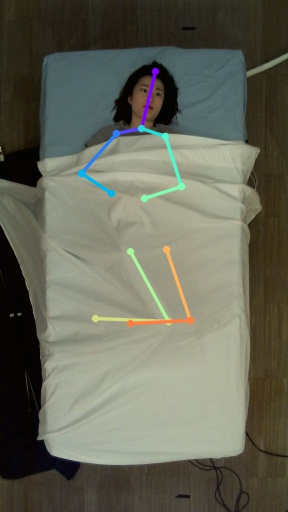

In [108]:
jt_RGB_rsz = jtA.copy() *scal_RGB
jt_RGB_rsz[:,2] = 1
img_skel = vis.vis_keypoints(RGB_rsz[:,:,::-1], jt_RGB_rsz, SLP_rd_test.skels_idx)
vis.ipyth_imshow(img_skel)

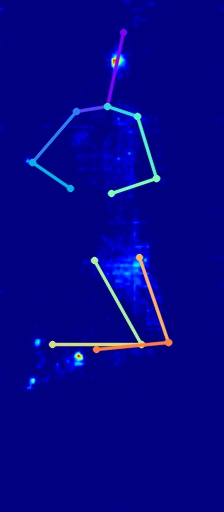

In [109]:
# show PM skels  
# PM_3c = np.stack((PM, )*3, axis=-1) 
PM_pseudo = cv2.applyColorMap(PM_rsz, cv2.COLORMAP_JET)     
jt_PM_rsz = jt_PM*scal_PM
jt_PM_rsz[:,2] = 1  # all visible 
img_skel = vis.vis_keypoints(PM_pseudo, jt_PM_rsz, SLP_rd_test.skels_idx) 
vis.ipyth_imshow(img_skel)

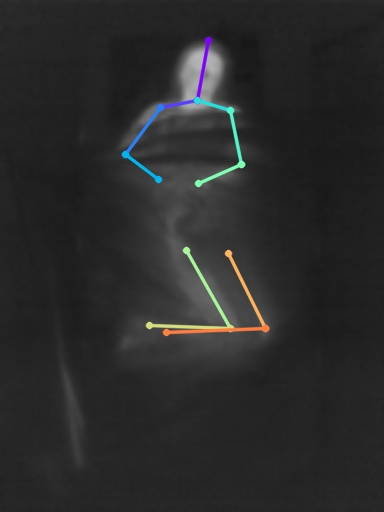

In [110]:
IR_pseudo = cv2.applyColorMap(IR_rsz, cv2.COLORMAP_JET)     
jt_IR_rsz = jt_IR*scal_IR
jt_IR_rsz[:,2] = 1  # all visible 
img_skel = vis.vis_keypoints(IR_rsz_3c, jt_IR_rsz, SLP_rd_test.skels_idx) 
vis.ipyth_imshow(img_skel)


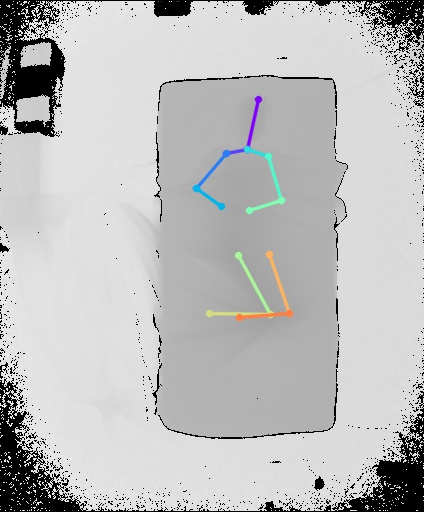

In [111]:
depth_pseudo = cv2.applyColorMap(depth_rsz, cv2.COLORMAP_JET)     
jt_depth_rsz = jtB*scal_depth
jt_depth_rsz[:,2] = 1  # all visible 
img_skel = vis.vis_keypoints(depth_rsz_3c, jt_depth_rsz, SLP_rd_test.skels_idx) 
vis.ipyth_imshow(img_skel)


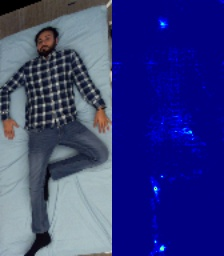

In [60]:
# align to PM 
RGB2PM = SLP_rd_test.get_array_A2B(idx=idx, modA='RGB', modB='PM')
RGB2PM = cv2.resize(RGB2PM, (int(84 * h /192), h))
img_cb = np.concatenate([RGB2PM[...,::-1], PM_pseudo], axis=1)
vis.ipyth_imshow(img_cb) 